In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import IsolationForest
from sklearn import datasets
from scipy.stats import iqr
from scipy.cluster.vq import kmeans, vq # K-means clustering and vector quantization
from sklearn.neighbors import LocalOutlierFactor

%matplotlib inline

In [2]:
np.random.seed(3147)

In [3]:
# x = np.random.randint(low = 1, high = 10, size = 100)
sp_data = np.random.normal(0,1,1000)

In [10]:
x_df = pd.DataFrame(sp_data, columns=['x'])

In [5]:
# x_df.info()
x_df.describe()

,0
count,1000.000000
mean,-0.038304
std,0.995737
min,-3.380516
25%,-0.701010
50%,-0.055653
75%,0.663260
max,2.784868


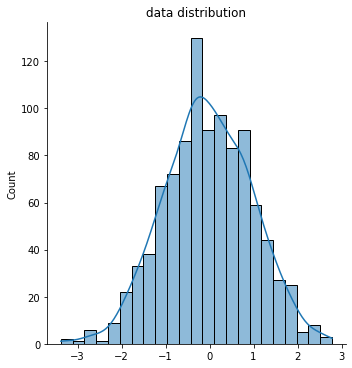

In [6]:
# create the displot
sns.displot(sp_data, kde = True)

# lebel the axis
plt.title("data distribution")
plt.show()

In [11]:
print("Skewness: ",x_df.skew())
print("Kurtosis: ",x_df.kurt())

Skewness:  x   -0.052572
dtype: float64
Kurtosis:  x   -0.0625
dtype: float64


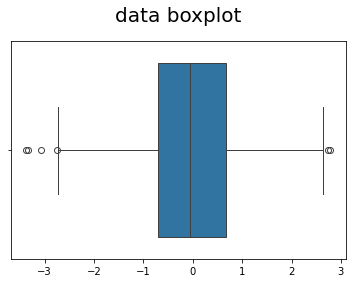

In [12]:
#create the boxplot
ax = sns.boxplot(x=sp_data)
ax.set_title("data boxplot", fontsize =20, pad = 20)

plt.show()

In [8]:
#extract the upper and lower quantiles
x_lq = x_df.quantile(0.25)
x_uq = x_df.quantile(0.75)
#extract the inter quartile range
x_iqr = x_uq - x_lq

#get the upper and lower bounds
lower_bound = x_lq - 1.5*x_iqr # -2.747416
upper_bound = x_uq + 1.5*x_iqr # 2.709666
# lower_bound

In [9]:
def x_outlier(data):
    list = []
    for dt in data:
        if dt > upper_bound:
            list.append(dt)
        elif dt < lower_bound:
            list.append(dt)
    return list

In [10]:
IQR_outliers = x_df[(x_df <= lower_bound) | (x_df >= upper_bound)]
print(len(IQR_outliers))

1000


In [11]:
IQR_outliers.isna().sum()
# so there actual 6 value are not null

0    994
dtype: int64

In [12]:
#calculate the Z score
x_df["1"] = (x_df - x_df.mean())/x_df.std()

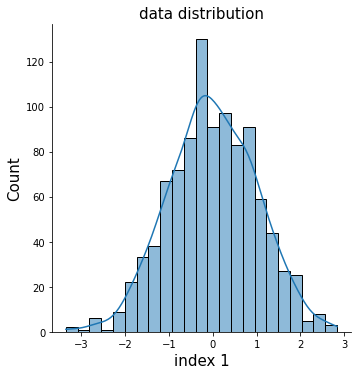

In [13]:
#show the distribution plot
sns.displot(x_df["1"],
           kde = True)

plt.xlabel("index 1", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("data distribution", fontsize = 15)

plt.show()

In [14]:
data_outliers = x_df[abs(x_df["1"]) >= 3]
data_outliers

,0,1
123,-3.380516,-3.356521
146,-3.336923,-3.312742
327,-3.075784,-3.050485


In [15]:
x = np.random.seed(3147)
# x = np.random.randint(low = 1, high = 10, size = 100)
x = np.random.normal(0,1,1000)
x_df = pd.DataFrame(x, columns=['x'])

In [16]:
y = np.random.normal(0,1,1000)
y_df = pd.DataFrame(y, columns=['y'])

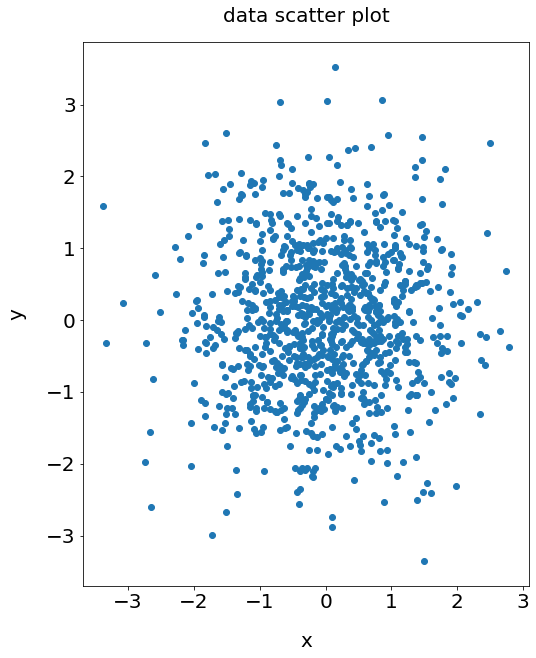

In [17]:
#create the base axis
fig, ax = plt.subplots(1,1, figsize = (8,10))

#plot the scatter plot
ax.scatter(x_df, y_df)

#add labels
ax.set_xlabel("x", fontsize = 20, labelpad = 20)
ax.set_ylabel("y", fontsize = 20, labelpad = 20)
ax.set_title("data scatter plot", fontsize = 20, pad = 20)
#alter the tick parametes
ax.tick_params(axis = "both", labelsize = 20)

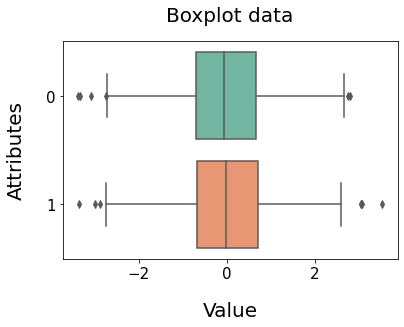

In [18]:
ax = sns.boxplot(data = [x_df, y_df], orient = "h", palette = "Set2")

ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot data", fontsize = 20,
            pad = 20)
ax.tick_params(which = "both", labelsize = 15)

In [19]:
#create a function to calculate IQR bounds
def IQR_bounds(dataframe, column_name, multiple):
    """Extract the upper and lower bound for outlier detection using IQR
    
    Input:
        dataframe: Dataframe you want to extract the upper and lower bound from
        column_name: column name you want to extract upper and lower bound for
        multiple: The multiple to use to extract this
        
    Output:
        lower_bound = lower bound for column
        upper_bound = upper bound for column"""
    
    #extract the quantiles for the column
    lower_quantile = dataframe[column_name].quantile(0.25)
    upper_quantile = dataframe[column_name].quantile(0.75)
    #cauclat IQR
    IQR = upper_quantile - lower_quantile
    
    #extract lower and upper bound
    lower_bound = lower_quantile - multiple * IQR
    upper_bound = upper_quantile + multiple * IQR
    
    #retrun these values
    return lower_bound, upper_bound

In [20]:
x_s = x_df.squeeze()
y_s = y_df.squeeze()

In [25]:
xy_data = pd.concat([x_s, y_s], axis=1)
# xy_data

In [29]:
#set the columns we want
columns = ["x", "y"]
#create a dictionary to store the bounds
column_bounds = {}

#iteratre over each column to extract bounds
for column in columns:
    #extract normal and extreme bounds
    lower_bound, upper_bound =  IQR_bounds(xy_data, column, 1.5)
    lower_bound_extreme, upper_bound_extreme = IQR_bounds(xy_data, column, 3)
    #send them to the dictionary
    column_bounds[column] = [lower_bound, upper_bound,
                            lower_bound_extreme, upper_bound_extreme]

#create the normal dataframe
IQR_AD = xy_data[(xy_data["x"] < column_bounds["x"][0]) | 
                         (xy_data["x"] > column_bounds["x"][1]) |
                         (xy_data["y"] < column_bounds["y"][0]) | 
                         (xy_data["y"] > column_bounds["y"][1])
                        ]
#create the extreme dataframe
IQR_AD_extreme = xy_data[(xy_data["x"] < column_bounds["x"][2]) |
                         (xy_data["x"] > column_bounds["x"][3]) |
                         (xy_data["y"] < column_bounds["y"][2]) | 
                         (xy_data["y"] > column_bounds["y"][3])
                         ]

In [30]:
IQR_AD

,x,y
121,-2.749889,-1.969803
123,-3.380516,1.588671
137,0.147284,3.523628
146,-3.336923,-0.323968
238,-0.693876,3.033835
275,0.857830,3.066491
327,-3.075784,0.241228
369,1.496552,-3.355163
659,0.105083,-2.875688
790,0.027770,3.046245


In [31]:
# IQR_AD_extreme # will print none

,x,y


In [32]:
#create the normal dataframe
xy_data["IQR_AD"] = ((xy_data["x"] < column_bounds["x"][0]) | 
                         (xy_data["x"] > column_bounds["x"][1]) |
                         (xy_data["y"] < column_bounds["y"][0]) | 
                         (xy_data["y"] > column_bounds["y"][1])
                    )

In [35]:
xy_data

,x,y,IQR_AD
0,0.054705,2.270637,False
1,-0.244521,0.087949,False
2,1.377259,0.486600,False
3,-0.058930,0.963328,False
4,-1.063171,-1.265654,False
...,...,...,...
995,-0.039968,-0.968966,False
996,1.460541,1.684413,False
997,-0.847562,0.181981,False
998,-0.164508,0.740688,False


In [34]:
count = 0
for na in xy_data.IQR_AD:
    if na == True:
        count+=1
print(count)
# there 13 value were the value is True

13


In [36]:
xy_data["IQR_AD"] = xy_data["IQR_AD"].apply(lambda x: str(1) if x == False else str(-1))

In [49]:
# np.shape(xy_data.y)
xy_data

,x,y,IQR_AD,iso_forest_outliers,iso_forest_scores
0,0.054705,2.270637,1,1,0.091039
1,-0.244521,0.087949,1,1,0.234976
2,1.377259,0.486600,1,1,0.170901
3,-0.058930,0.963328,1,1,0.211917
4,-1.063171,-1.265654,1,1,0.162839
...,...,...,...,...,...
995,-0.039968,-0.968966,1,1,0.214617
996,1.460541,1.684413,1,1,0.094902
997,-0.847562,0.181981,1,1,0.202303
998,-0.164508,0.740688,1,1,0.217779


In [52]:
#plot teh scatter plot
# fig = px.scatter(xy_data, x = "x", y = "y",
#           color = "IQR_AD", 
#           hover_name = "name")
fig = px.scatter(xy_data, x = "x", y = "y", color = "IQR_AD")
fig.update_layout(title = "IQR outlier detection",
                 title_x = 0.5)
fig.show()

In [46]:
from sklearn.ensemble import IsolationForest

#create the method instance
isf = IsolationForest(n_estimators = 100, random_state = 42, contamination = 0.02)
#use fit_predict on the data as we are using all the data
preds = isf.fit_predict(xy_data[["x", "y"]])
#extract outliers from the data
xy_data["iso_forest_outliers"] = preds
xy_data["iso_forest_outliers"] = xy_data["iso_forest_outliers"].astype(str)
#extract the scores from the data in terms of strength of outlier
xy_data["iso_forest_scores"] = isf.decision_function(xy_data[["x", "y"]])

#print how many outliers the data suggests
print(xy_data["iso_forest_outliers"].value_counts())

1     980
-1     20
Name: iso_forest_outliers, dtype: int64


In [53]:
#this plot will be repeated so it is better to create a function
def scatter_plot(dataframe, x, y, color, title):
    """Create a plotly express scatter plot with x and y values with a colour
    
    Input:
        dataframe: Dataframe containing columns for x, y, colour and hover_name data
        x: The column to go on the x axis
        y: Column name to go on the y axis
        color: Column name to specify colour
        title: Title for plot
        hover_name: column name for hover
        
    Returns:
        Scatter plot figure
    """
    #create the base scatter plot
    fig = px.scatter(dataframe, x = x, y=y,
                    color = color)
    #set the layout conditions
    fig.update_layout(title = title,
                     title_x = 0.5)
    #show the figure
    fig.show()

In [56]:
#create scatter plot
scatter_plot(xy_data, "x", "y", "iso_forest_outliers",
             "Isolation Forest Outlier Detection")

In [58]:
#create the same plot focusing on the scores from the dataset
scatter_plot(xy_data, "x", "y", "iso_forest_scores",
             "Isolation Forest Outlier Detection Scores")

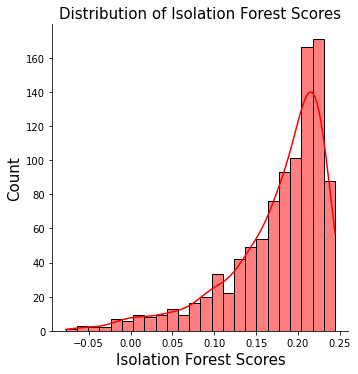

In [59]:
#create the distribution plot
sns.displot(xy_data["iso_forest_scores"],color='red',label='if',
           kde = True);

#set the title
plt.title('Distribution of Isolation Forest Scores', fontsize = 15, loc='center')
plt.xlabel("Isolation Forest Scores", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

#show the result
plt.show()

In [60]:
#import the algorithm
from sklearn.neighbors import LocalOutlierFactor

#initialise the algorithm
lof = LocalOutlierFactor(n_neighbors = 20)
#fit it to the training data, since we don't use it for novelty than this is fine
y_pred = lof.fit_predict(xy_data[["x", "y"]])

#extract the predictions as strings
xy_data["lof_outliers"] = y_pred.astype(str)
#print the number of outliers relative to non-outliers
print(xy_data["lof_outliers"].value_counts())
#extract the outlier scores
xy_data["lof_scores"] = lof.negative_outlier_factor_

1     967
-1     33
Name: lof_outliers, dtype: int64


In [61]:
scatter_plot(xy_data, "x", "y", "lof_outliers",
             "Local Outlier Factor Outlier Detection")

In [63]:
scatter_plot(xy_data, "x", "y", "lof_scores",
             "Local Outlier Factor scores")

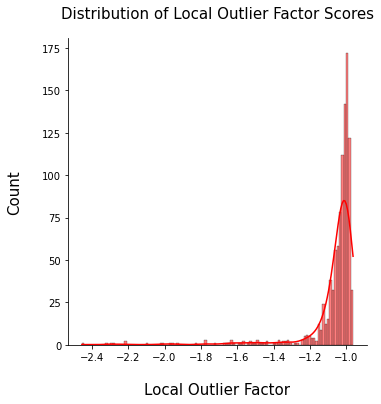

In [64]:
#create the distribution plot
sns.displot(xy_data["lof_scores"],color='red',label='if',
           kde = True);

#set the title
plt.title("Distribution of Local Outlier Factor Scores", fontsize = 15, loc='center', pad = 20)
plt.xlabel("Local Outlier Factor", fontsize = 15, labelpad = 20)
plt.ylabel("Count", fontsize = 15, labelpad = 20)

#show the result
plt.show()

In [65]:
#import the algorithm
from sklearn.cluster import DBSCAN

#initiate the algorithm
#set the distance to 20, and min_samples as 5
outlier_detection = DBSCAN(eps = 20, metric = "euclidean", min_samples = 10, n_jobs = -1)
#fit_predict the algorithm to the existing data
clusters = outlier_detection.fit_predict(xy_data[["x", "y"]])

#extract the labels from the algorithm
xy_data["dbscan_outliers"] = clusters
#label all others as inliers 
xy_data["dbscan_outliers"] = xy_data["dbscan_outliers"].apply(lambda x: str(1) if x>-1 else str(-1))
#print the vaue counts
print(xy_data["dbscan_outliers"].value_counts())

# using DBSCan there is no found outliers

1    1000
Name: dbscan_outliers, dtype: int64


In [66]:
scatter_plot(xy_data, "x", "y", "dbscan_outliers",
             "DBScan Outlier Detection")

In [68]:
#import the required library
from sklearn import svm

#initiate the model
svm_model = svm.OneClassSVM(nu = 0.2, kernel = "rbf", gamma = "auto")
#apply the model to the data
outliers = svm_model.fit_predict(xy_data[["x", "y"]])

#extract the labels
xy_data["ocsvm_outliers"] = outliers
#change the labels
xy_data["ocsvm_outliers"] = xy_data["ocsvm_outliers"].apply(lambda x: str(-1) if x == -1 else str(1))
#extract the score
xy_data["ocsvm_scores"] = svm_model.score_samples(xy_data[["x", "y"]])
#print the value counts for inlier and outliers
print(xy_data["ocsvm_outliers"].value_counts())

1     799
-1    201
Name: ocsvm_outliers, dtype: int64


In [70]:
scatter_plot(xy_data, "x", "y", "ocsvm_outliers",
             "One Class SVM Outlier Detection")
# The outliers is the blue one

In [72]:
#import the necessary library and functionality
from sklearn.covariance import EllipticEnvelope

#create the model, set the contamination as 0.02
EE_model = EllipticEnvelope(contamination = 0.02)
#implement the model on the data
outliers = EE_model.fit_predict(xy_data[["x", "y"]])

#extract the labels
xy_data["EE_outliers"] = outliers
#change the labels
xy_data["EE_outliers"] = xy_data["EE_outliers"].apply(lambda x: str(-1) if x == -1 else str(1))
#extract the score
xy_data["EE_scores"] = EE_model.score_samples(xy_data[["x", "y"]])
#print the value counts for inlier and outliers
print(xy_data["EE_outliers"].value_counts())

1     980
-1     20
Name: EE_outliers, dtype: int64


In [73]:
#plot the results
scatter_plot(xy_data, "x", "y", "EE_outliers",
             "Elliptic Envelope Outlier Detection")

In [75]:
#plot the scores
scatter_plot(xy_data, "x", "y", "EE_scores",
             "Elliptic Envelope scores")

In [76]:
#extract the sum of the outlier count
xy_data['outliers_sum'] = (xy_data['iso_forest_outliers'].astype(int)+
                           xy_data['lof_outliers'].astype(int)+
                           xy_data['dbscan_outliers'].astype(int)+
                          xy_data['EE_outliers'].astype(int))
#print the value counts for each scale
print(xy_data["outliers_sum"].value_counts())

 4    965
-2     17
 2     14
 0      4
Name: outliers_sum, dtype: int64


In [90]:
def count_the_detection_outliers(column_data):
    """
    count the outlier detected by the dbscan algorithm
    """
    cnt = 0
    for n in column_data:
        if n == -1:
            cnt += 1
    return cnt

In [99]:
# xy_data.info()

In [100]:
iso_forest = count_the_detection_outliers(xy_data['iso_forest_outliers'].astype(float))
lof = count_the_detection_outliers(xy_data['lof_outliers'].astype(float))
dbscan = count_the_detection_outliers(xy_data['dbscan_outliers'].astype(float))
ee_out = count_the_detection_outliers(xy_data['EE_outliers'].astype(float))

print("iso forest : ",iso_forest)
print("lof        : ",lof)
print("dbscan     : ",dbscan)
print("ee_out     : ",ee_out)

# we can see the comparison how each algorithm detect each outliers

iso forest :  20
lof        :  33
dbscan     :  0
ee_out     :  20


In [101]:
scatter_plot(xy_data, "x", "y", "outliers_sum",
             "Ensemble outlier detection")